In [15]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import glob,os.path,re
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False



In [12]:
# 각 파일 처리
def load_files(path):
    freqs = []  # 전체 
    results = []    # 리스트
    file_list = glob.glob(path)
    for fname in file_list:     # 파일개수(20번) 실행
        name = os.path.basename(fname) # 파일1번, 파일2번
        lang = name.split('-')[0]           # 얘를 만드는 이유는 target 값을 만들기 위해
        
        with open(fname,'r',encoding='utf-8') as f:       # fname : './lang/train\\en-1.txt',
            text = f.read()
        
        text = text.lower()
        cnt = [0 for n in range(26)]
        code_a = ord('a')
        code_z = ord('z')
        
        # a-z 사이의 문자만 하나씩 저장
        for ch in text:
            n = ord(ch)     # 문자를 아스키코드를 이용해 숫자로 바꿈.
            if code_a <= n <= code_z:       # a는 0번쨰, b는 1번째 .... 각각 플러스 시킴
                cnt[n-code_a] += 1
                
        # 정규화 작업 - 각 피처마다 비율을 일정하게 맞춤
        total = sum(cnt)
        # 데이터의 값이 0-1 사이인 값으로 변환
        freq = list(map(lambda n : n/total,cnt))
            
        # 데이터 저장
        freqs.append(freq)
        
        # 결과값 리스트 저장  
        results.append(lang)
    
    return {'freqs':freqs,'results':results}

파일 확인

In [13]:

path = './lang/train/*.txt'
path2 = './lang/test/*.txt'

# 함수호출 - train_input, train_target,test_input,test_target
data = load_files(path)     # 함수호출 - 20개의 train 데이터를 가져옴.
test = load_files(path2)    # 함수호출 - 8개의 train 데이터를 가져옴.
data['freqs'][0]
test['freqs'][0]
data['results'][0]
# 폴더 내 모든 데이터(파일)를 읽어 옴
# file_list=glob.glob(link)
# file_list
path

'./lang/train/*.txt'

# 데이터 전처리 - train 세트, test 세트 생성

In [14]:
# 1개 파일이름
path = './lang/train/*.txt'
path2 = './lang/test/*.txt'

name = os.path.basename(path[0])
name.split('-')[0]

# 1개 파일 내용 읽어오기
cnt = [0 for n in range(0,26)]      # np.zeros(26) 와 같음 , np.ones(26)은 1을 26개
with open('./lang/train/'+name,'r',encoding='utf-8') as f:
    # print(f.read())
    text = f.read()
    text = text.lower() # 소문자로 
    # 문자 개수 세기
    # 영문자가 26개 있음. 배열 26개 짜리를 생성
    
    # 1글자씩 읽어와서 26의 배열에 1로 추가
    code_a = ord('a')
    code_z = ord('z')
    for ch in text: # len(text)
        n = ord(ch)
        if code_a <= n <= code_z:
            cnt[n-code_a] += 1    # 리스트에 저장
            
    total = sum(cnt)
    
    # freq의 배열의 값을 total로 나눠서 다시 리스트를 만듬.
    freq = list(map(lambda n : n/total,cnt))
    # for i in cnt:
        # freq.append((i/total))
    
    
print(freq)
    
    
    
    
    

PermissionError: [Errno 13] Permission denied: './lang/train/.'

In [ ]:
name = os.path.basename(path[0])
data = []
results = []

# 폴더 모든 파일의 이름을 가져옴.
for fname in path:
    name = os.path.basename(fname)
    # print(name.split('-')[0])
    results.append(name.split('-')[0])    # 앞에 있는 2 글자만 분리


['en',
 'en',
 'en',
 'en',
 'en',
 'fr',
 'fr',
 'fr',
 'fr',
 'fr',
 'id',
 'id',
 'id',
 'id',
 'id',
 'tl',
 'tl',
 'tl',
 'tl',
 'tl']

In [ ]:
chr(2)
ord('z')
code_z = ord('z')

122

In [ ]:
data['freqs']
# data['results']

[[0.07595212187159957,
  0.012840043525571273,
  0.04570184983677911,
  0.04613710554951034,
  0.10533188248095757,
  0.015669205658324265,
  0.019151251360174103,
  0.043743199129488576,
  0.07399347116430903,
  0.0017410228509249185,
  0.00544069640914037,
  0.05375408052230685,
  0.026332970620239392,
  0.07747551686615888,
  0.08966267682263329,
  0.016539717083786723,
  0.0,
  0.07769314472252448,
  0.061371055495103376,
  0.08052230685527748,
  0.02589771490750816,
  0.009793253536452665,
  0.014145810663764961,
  0.0006528835690968443,
  0.02002176278563656,
  0.0004352557127312296],
 [0.08417789436031954,
  0.019911768212710148,
  0.030404196971503518,
  0.038869679265529984,
  0.13699773458924527,
  0.017407893167998092,
  0.031238821986407535,
  0.02742339334684631,
  0.07535471563133421,
  0.0026231071896983425,
  0.009777035888875641,
  0.042327411470132345,
  0.024204125432216526,
  0.05353523309884345,
  0.06879694765708835,
  0.020269464647669013,
  0.005484678669369262,

In [ ]:
clf = svm.SVC()
clf.fit(data['freqs'],data['results'])

predict = clf.predict(test['freqs'])

clf.score(test['freqs'],test['results'])

1.0

In [ ]:
metrics.classification_report(test['results'],predict)

'              precision    recall  f1-score   support\n\n          en       1.00      1.00      1.00         2\n          fr       1.00      1.00      1.00         2\n          id       1.00      1.00      1.00         2\n          tl       1.00      1.00      1.00         2\n\n    accuracy                           1.00         8\n   macro avg       1.00      1.00      1.00         8\nweighted avg       1.00      1.00      1.00         8\n'

array([<Axes: title={'center': 'en'}>, <Axes: title={'center': 'fr'}>,
       <Axes: title={'center': 'id'}>, <Axes: title={'center': 'tl'}>],
      dtype=object)

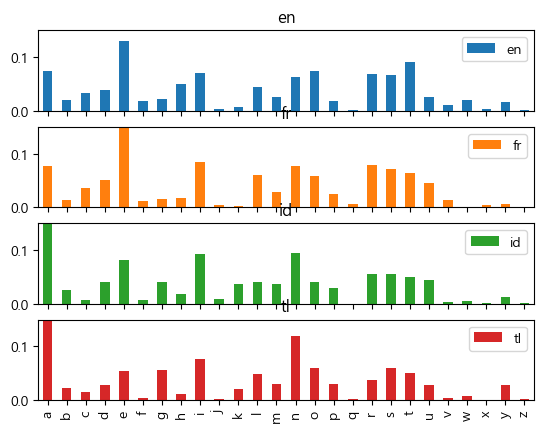

In [ ]:
# 그래프 그리기

lang_dic = {}
for i,result in enumerate(data['results']):
    fq = data['freqs'][i]    # data부분을 가지고 옴.
    if not (result in lang_dic):
        lang_dic[result] = fq
    for idx,v in enumerate(fq):
        lang_dic[result][idx] = (lang_dic[result][idx]+v) / 2
        

# x축의 눈금을 생성
asc_list = [chr(n) for n in range(97,123)]
df = pd.DataFrame(lang_dic,index=asc_list)
df.plot(kind='bar',subplots=True,ylim=(0,0.15))



In [ ]:
df.columns
df

,en,fr,id,tl
a,0.073919,0.076504,0.171599,0.201979
b,0.020681,0.012910,0.025640,0.022360
c,0.033506,0.036590,0.007429,0.015670
d,0.039112,0.050464,0.040608,0.027269
e,0.131043,0.148523,0.081552,0.055009
f,0.018279,0.012366,0.007096,0.004491
g,0.022372,0.016131,0.040386,0.056326
h,0.050611,0.016545,0.018533,0.011768
i,0.069991,0.084102,0.092387,0.075942
j,0.002604,0.003689,0.007693,0.001994


(0.0, 0.15)

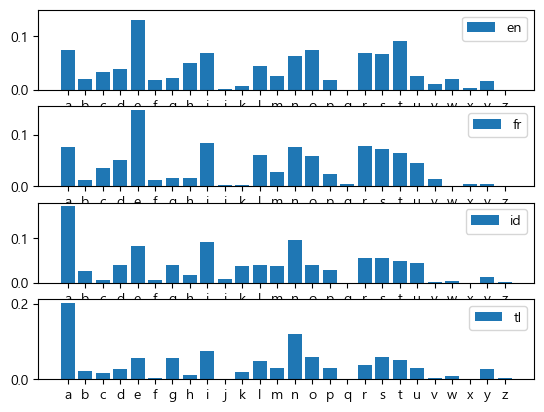

In [ ]:
fig,axs = plt.subplots(4)
axs[0].bar(df.index,df['en'],label=df.columns[0])
axs[1].bar(df.index,df['fr'],label=df.columns[1])
axs[2].bar(df.index,df['id'],label=df.columns[2])
axs[3].bar(df.index,df['tl'],label=df.columns[3])
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[0].set_ylim(0,0.15)